# -cctv  EDA-

### 필요한 라이브러리 및 데이터 호출

In [169]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import scipy as sp
from collections import Counter

# Graphs
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

In [140]:
cctv = pd.read_csv('C:/Users/User/Desktop/청년인턴/분석과제/CCTV/동혁_화성시CCTV/9.9결과/CCTV분석최종데이터/final_cctv4.csv',encoding='cp949')
crime = pd.read_csv('C:/Users/User/Desktop/청년인턴/분석과제/CCTV/동혁_화성시CCTV/9.9결과/읍면동별 범죄등급/emd_crime.csv',encoding='cp949')

### 데이터 결측값 처리

In [65]:
#결측값 -> 0 처리
cctv['총인구'] = cctv['총인구'].fillna(0)
cctv['범죄등급합'] = cctv['범죄등급합'].fillna(0)
cctv['단독주택면적'] = cctv['단독주택면적'].fillna(0)
cctv['범죄취약인구'] = cctv['범죄취약인구'].fillna(0)

cctv['age8_13'] = cctv['age8_13'].fillna(0)
cctv['age14_16'] = cctv['age14_16'].fillna(0)
cctv['age17_19'] = cctv['age17_19'].fillna(0)
cctv['age20_29'] = cctv['age20_29'].fillna(0)
cctv['age30_39'] = cctv['age30_39'].fillna(0)
cctv['age_total'] = cctv['age_total'].fillna(0)
cctv['time_24_06'] = cctv['time_24_06'].fillna(0)
cctv['time_18_24'] = cctv['time_18_24'].fillna(0)

cctv['감시취약지수'] = cctv['감시취약지수'].fillna(0)
cctv['최종설치지수'] = cctv['최종설치지수'].fillna(0)

### 데이터 정제

In [66]:
#cctv설치유무 1,0으로 생성
cctv_list = []
for i in range(0,len(cctv)):
    if cctv['CCTV갯수'][i]>=1:
        cctv_list.append(1)
    else:
        cctv_list.append(0)

In [67]:
cctv['CCTV설치유무']=cctv_list

In [96]:
cctv2 = cctv.groupby('읍면동').sum().reset_index()

,읍면동,총인구,CCTV갯수,CCTV조회건수,범죄등급합,cctv설치유무,유흥갯수,숙박갯수,금융갯수,단독주택면적,...,age14_16,age17_19,age_total,time_24_06,time_18_24,격자가중치,감시취약지수,범죄취약지수,최종설치지수,CCTV설치유무
0,금곡동,827.0,22,31,68.0,15,0,1,0,22781.053,...,0.0,0.0,275.0,560.718337,2402.845832,235.139,427.647,284.756,713.882,15
1,기산동,12505.0,51,110,264.0,19,4,0,2,10086.573,...,180.0,201.0,6151.0,2394.363335,9234.947502,148.208,442.973,436.052,907.987,19
2,기안동,13287.0,65,109,268.0,28,7,2,0,15093.296,...,208.0,251.0,6486.0,2954.380000,11220.345843,265.817,525.090,622.512,1183.496,28
3,남양읍,46689.0,660,611,1374.0,258,72,10,6,305270.971,...,330.0,203.0,20701.0,9950.771643,43922.834175,6971.108,6459.052,4455.096,11060.879,258
4,능동,51240.0,141,409,980.0,72,22,2,1,15947.558,...,681.0,645.0,25279.0,7206.745835,33110.968330,280.134,1300.103,1198.192,2591.957,72
5,마도면,4985.0,316,314,727.0,162,11,1,1,178161.438,...,12.0,7.0,1445.0,4452.685807,17637.633337,3315.219,2743.315,1824.919,4637.855,162
6,매송면,6976.0,159,186,433.0,96,6,4,0,127522.341,...,9.0,7.0,3049.0,6952.389987,27090.675837,2848.173,1554.135,1951.819,3518.736,96
7,목동,24486.0,81,7,15.0,24,1,0,0,1688.095,...,198.0,134.0,12147.0,489.779166,1448.800840,184.389,631.452,304.000,951.179,24
8,반송동,72425.0,293,1249,3098.0,126,199,31,16,86657.264,...,1509.0,1256.0,36277.0,18086.874165,84707.951665,442.143,1964.905,2039.427,4180.018,126
9,반월동,32685.0,131,221,565.0,46,20,0,2,8674.561,...,441.0,414.0,15926.0,9774.759997,36599.474162,437.409,992.700,1486.143,2536.257,46


### 상관관계

In [170]:
cctv2.corr()

,총인구,CCTV갯수,CCTV조회건수,범죄등급합,cctv설치유무,유흥갯수,숙박갯수,금융갯수,단독주택면적,범죄취약인구,...,age17_19,age_total,time_24_06,time_18_24,격자가중치,감시취약지수,범죄취약지수,최종설치지수,CCTV설치유무,sangga
총인구,1.000000,0.646161,0.772928,0.778573,0.512103,0.791668,0.132283,0.719483,0.115399,0.933538,...,0.932285,0.997862,0.734134,0.787343,0.079204,0.352083,0.436726,0.404327,0.512103,0.745526
CCTV갯수,0.646161,1.000000,0.816824,0.802573,0.921502,0.700459,0.228428,0.582515,0.593805,0.399310,...,0.422914,0.604591,0.676781,0.662777,0.589772,0.735564,0.769755,0.765754,0.921502,0.684846
CCTV조회건수,0.772928,0.816824,1.000000,0.999340,0.816029,0.922076,0.439782,0.829912,0.508019,0.663119,...,0.706069,0.743871,0.826513,0.848989,0.443892,0.633696,0.703560,0.682086,0.816029,0.940034
범죄등급합,0.778573,0.802573,0.999340,1.000000,0.800892,0.928746,0.445553,0.837850,0.490127,0.678061,...,0.720495,0.750925,0.824630,0.849144,0.423604,0.615342,0.687894,0.664846,0.800892,0.947592
cctv설치유무,0.512103,0.921502,0.816029,0.800892,1.000000,0.658747,0.384497,0.556001,0.809083,0.294613,...,0.332698,0.461590,0.714246,0.666568,0.801952,0.881307,0.872554,0.894218,1.000000,0.687342
유흥갯수,0.791668,0.700459,0.922076,0.928746,0.658747,1.000000,0.272498,0.929973,0.323724,0.724652,...,0.768049,0.771508,0.753039,0.799409,0.243881,0.456465,0.554940,0.515859,0.658747,0.969467
숙박갯수,0.132283,0.228428,0.439782,0.445553,0.384497,0.272498,1.000000,0.280275,0.443780,0.129599,...,0.157571,0.112422,0.282520,0.254633,0.381461,0.414006,0.326957,0.382719,0.384497,0.499355
금융갯수,0.719483,0.582515,0.829912,0.837850,0.556001,0.929973,0.280275,1.000000,0.286449,0.692829,...,0.726106,0.703785,0.744593,0.796118,0.219336,0.426896,0.525395,0.485284,0.556001,0.915633
단독주택면적,0.115399,0.593805,0.508019,0.490127,0.809083,0.323724,0.443780,0.286449,1.000000,-0.053462,...,-0.013603,0.060605,0.554103,0.441449,0.954001,0.940478,0.833979,0.906834,0.809083,0.402827
범죄취약인구,0.933538,0.399310,0.663119,0.678061,0.294613,0.724652,0.129599,0.692829,-0.053462,1.000000,...,0.991979,0.947900,0.662041,0.724903,-0.111993,0.145768,0.248506,0.204127,0.294613,0.686410


## 데이터 시각화

### 1.읍면동별 cctv 갯수

- 향남읍,남양읍,영천동,봉담읍 순서대로 설치가 많이 되어있다.

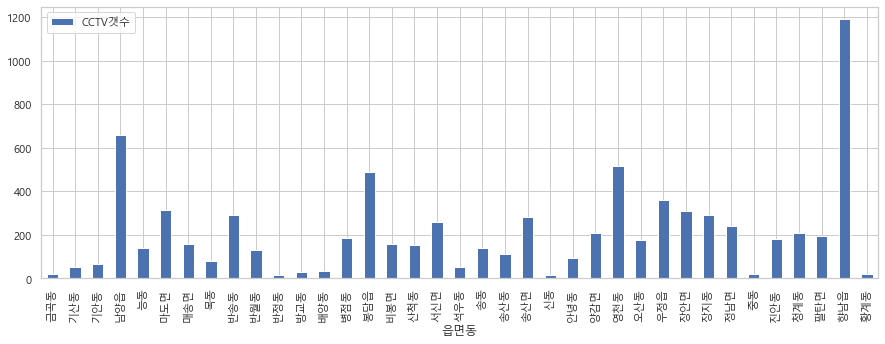

In [149]:
cctv2.plot.bar(x='읍면동',y='CCTV갯수')

### 2.읍면동별 CCTV조회건수

- 향남읍,반송동,봉담읍 순서대로 경찰이 이 지역에 설치되어있는 cctv를 조회하였다. 범죄,사고관련 사고가 많음을 예상할 수 있다.

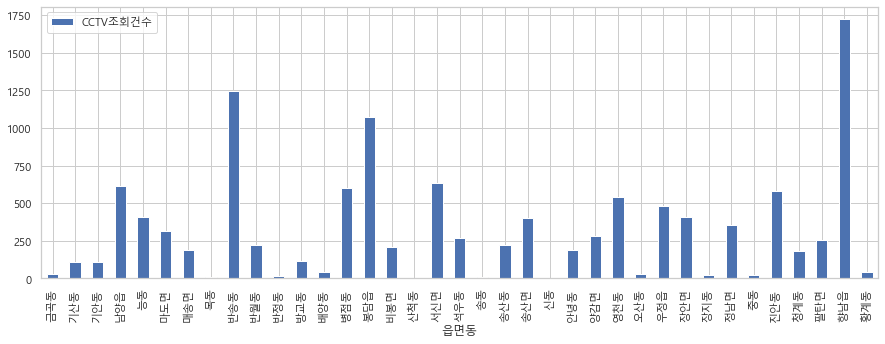

In [148]:
cctv2.plot.bar(x='읍면동',y='CCTV조회건수')

- 대체로 cctv갯수와 cctv조회건수는 양의상관관계(0.81)를 보이지만 반송동,봉답읍,향남읍,병점동 은 cctv갯수에 비해 조회건수가 매우 많다

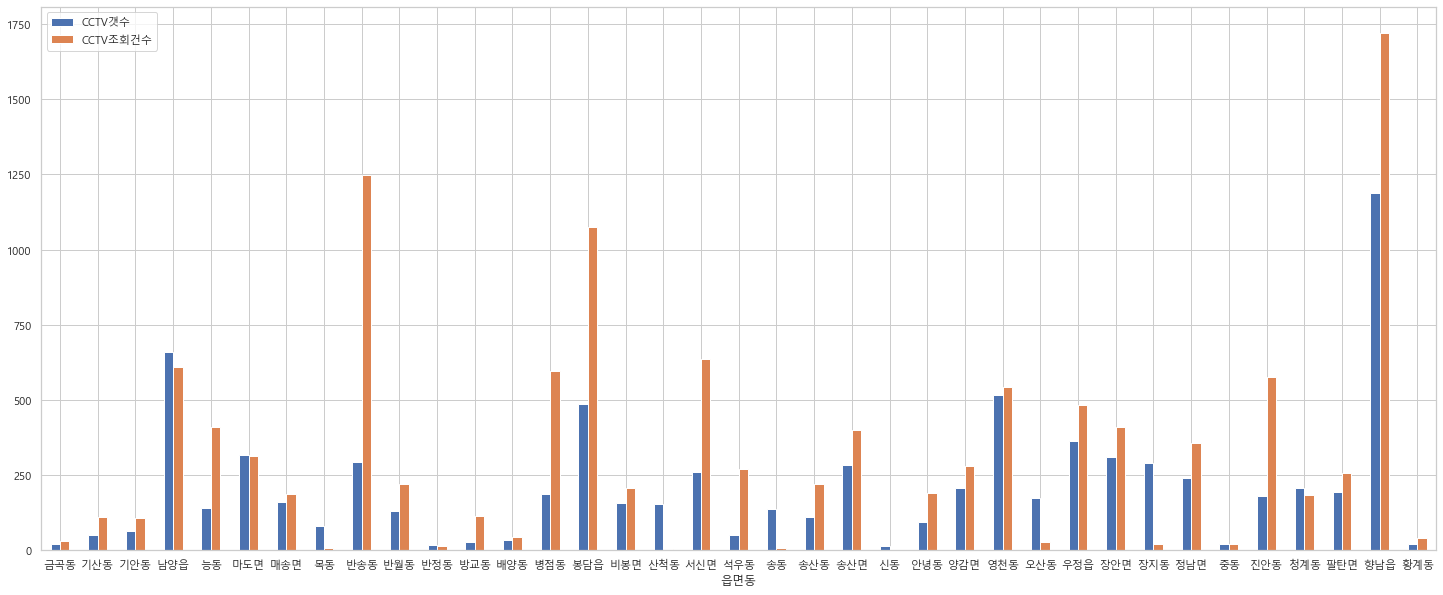

In [161]:
#cctv갯수와 cctv조회건수 한번에보기
plt.rcParams["figure.figsize"] = (25,10)
cctv_count = list(cctv2['CCTV갯수'])
cctv_show = list(cctv2['CCTV조회건수'])
index = cctv2['읍면동']
df = pd.DataFrame({'CCTV갯수': cctv_count,'CCTV조회건수': cctv_show}, index=index)
ax = df.plot.bar(rot=0)

### 3.읍면동별 범죄등급 분포

- cctv를 조회한 목적을 범죄등급별로 볼 수 있다. 범죄등급 '2' 인 것이 대부분이다.

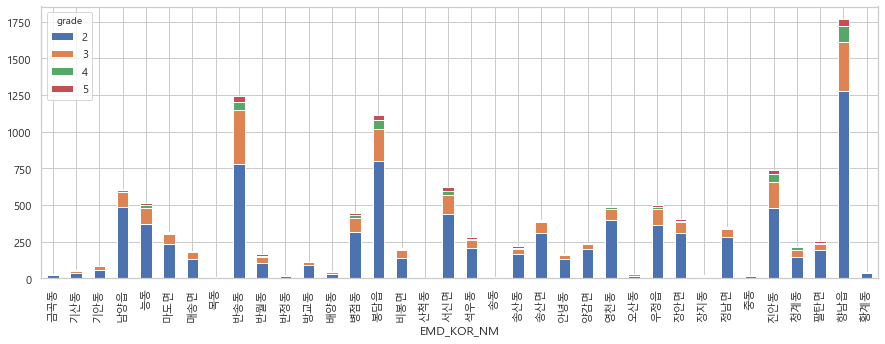

In [145]:
plt.rcParams["figure.figsize"] = (15,5)
ct = pd.crosstab(crime['EMD_KOR_NM'],crime['grade']) 
ct.plot.bar(stacked=True) 
plt.show() 

### 4.읍면동별 상가 분포

- 상가의 대부분은 유흥업소이며 향납읍,반송동에 상가가 가장 많음을 알 수 있다.

In [159]:
cctv2['sangga'] = cctv2['유흥갯수']+cctv2['숙박갯수']+cctv2['금융갯수']

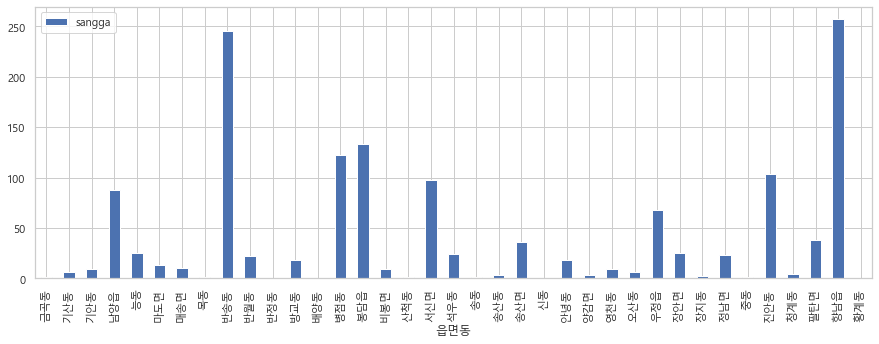

In [162]:
plt.rcParams["figure.figsize"] = (15,5)
cctv2.plot.bar(x='읍면동',y='sangga')

- 대체로 상가업소가 많은 지역은 발생한 범죄등급이 높다. 특히 봉담읍은 상가업소 갯수에비해 범죄등급이 꽤 높다는 것을 알 수 있다.

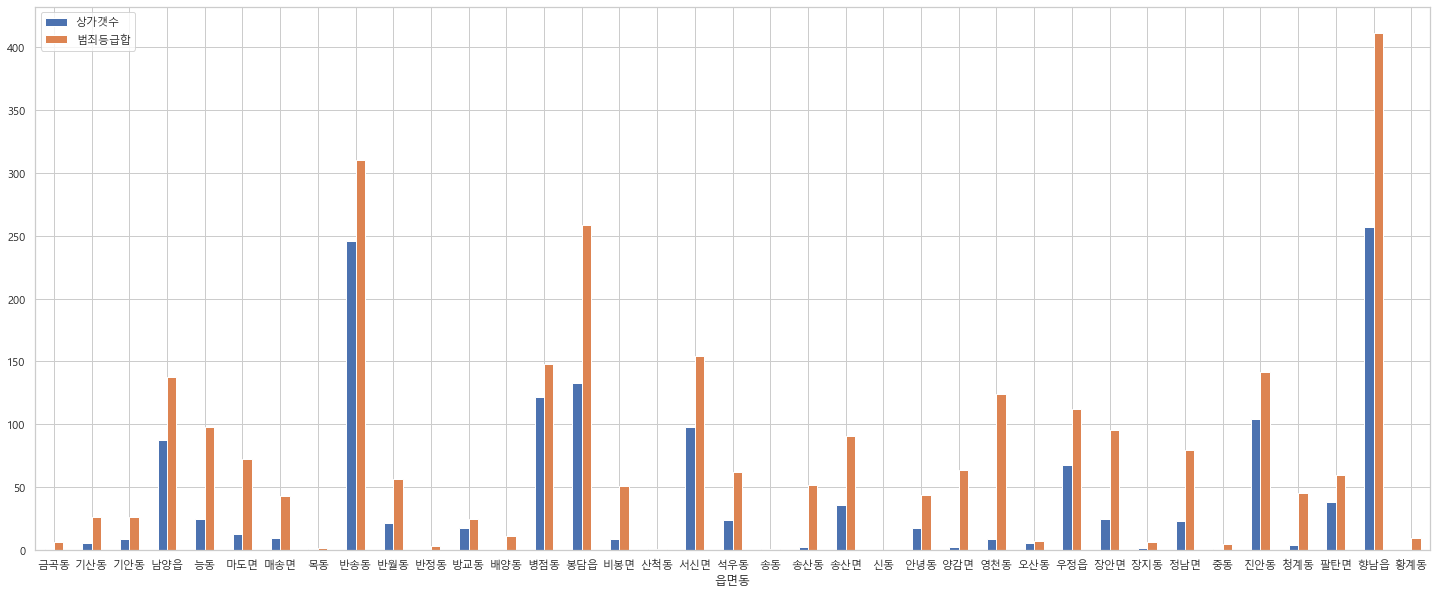

In [168]:
#상가갯수와 범죄등급합 한번에 보기
plt.rcParams["figure.figsize"] = (25,10)
sangga = list(cctv2['sangga'])
crime_grade = list(cctv2['범죄등급합']/10) #상가갯수와 범죄등급의 scale을 맞추기 위함
index = cctv2['읍면동']
df = pd.DataFrame({'상가갯수': sangga,'범죄등급합': crime_grade}, index=index)
ax = df.plot.bar(rot=0)

# 인구정보들어있는 데이터 정규성 파악

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([   0.,    0.,    0., ..., 1144., 1257., 1281.])),
 (25.052303037497097, 10.441386569363566, 0.39449768378673555))

Text(0.5, 1.0, 'ProbPlot of 총인구')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 283., 285., 303.])),
 (2.905338070557437, 1.0275068416251505, 0.2467259426092642))

Text(0.5, 1.0, 'ProbPlot of 범죄취약인구(10,20,30대)')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([ 0.,  0.,  0., ..., 76., 80., 94.])),
 (1.0597246587573204, 0.4032980141744444, 0.3177143826075197))

Text(0.5, 1.0, 'ProbPlot of 초등여학생')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([ 0.,  0.,  0., ..., 32., 33., 36.])),
 (0.36889271824723335, 0.13410988702547205, 0.27362314363377904))

Text(0.5, 1.0, 'ProbPlot of 중등여학생')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([ 0.,  0.,  0., ..., 28., 38., 40.])),
 (0.31841022032226113, 0.11461651813907811, 0.26407845216316345))

Text(0.5, 1.0, 'ProbPlot of 고등여학생')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 100., 146., 201.])),
 (1.2880015681500847, 0.5037400884148487, 0.34028973166801363))

Text(0.5, 1.0, 'ProbPlot of 20대여자')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 139., 150., 156.])),
 (2.1053278836818246, 0.8261174654410227, 0.3466227301821468))

Text(0.5, 1.0, 'ProbPlot of 30대여자')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 604., 618., 648.])),
 (12.025046591972117, 4.906574977194589, 0.38081067035994065))

Text(0.5, 1.0, 'ProbPlot of 총여자인구')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([   0.      ,    0.      ,    0.      , ..., 1872.515833,
         2333.081667, 2612.79    ])),
 (27.383147360287836, 12.861949559623898, 0.45295866870390317))

Text(0.5, 1.0, 'ProbPlot of 야간시간유동인구')

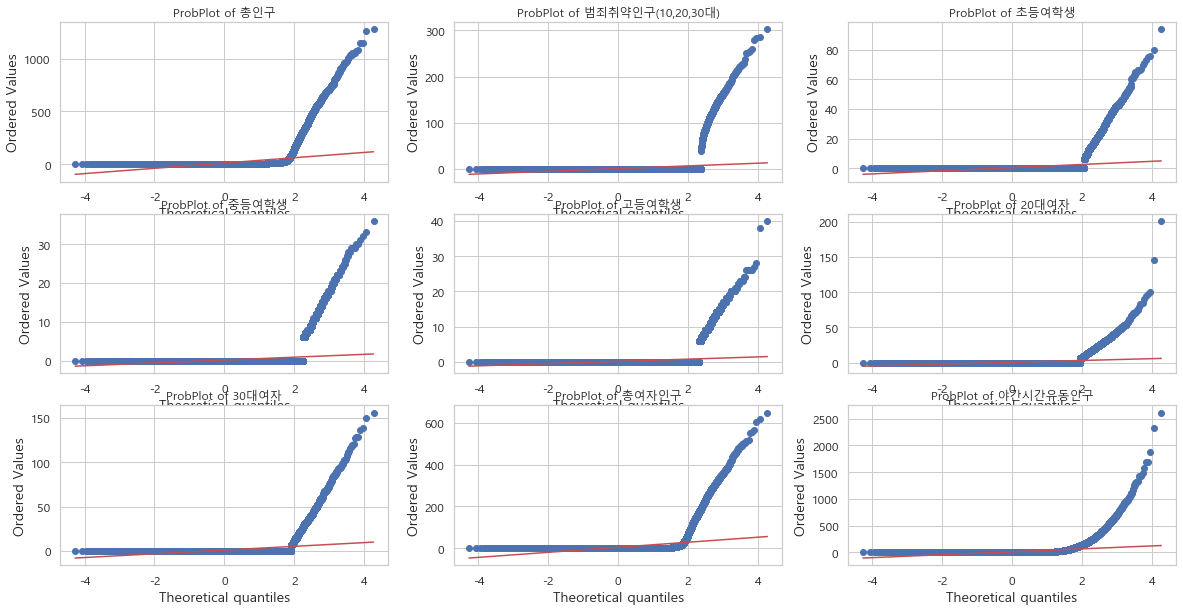

In [62]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(3,3,1)
sp.stats.probplot(cctv['총인구'], plot=plt)
plt.title("ProbPlot of 총인구")

plt.subplot(3,3,2)
sp.stats.probplot(cctv['범죄취약인구'], plot=plt)
plt.title("ProbPlot of 범죄취약인구(10,20,30대)")

plt.subplot(3,3,3)
sp.stats.probplot(cctv['age8_13'], plot=plt)
plt.title("ProbPlot of 초등여학생")

plt.subplot(3,3,4)
sp.stats.probplot(cctv['age14_16'], plot=plt)
plt.title("ProbPlot of 중등여학생")

plt.subplot(3,3,5)
sp.stats.probplot(cctv['age17_19'], plot=plt)
plt.title("ProbPlot of 고등여학생")

plt.subplot(3,3,6)
sp.stats.probplot(cctv['age20_29'], plot=plt)
plt.title("ProbPlot of 20대여자")

plt.subplot(3,3,7)
sp.stats.probplot(cctv['age30_39'], plot=plt)
plt.title("ProbPlot of 30대여자")

plt.subplot(3,3,8)
sp.stats.probplot(cctv['age_total'], plot=plt)
plt.title("ProbPlot of 총여자인구")

plt.subplot(3,3,9)
sp.stats.probplot(cctv['time_18_24'], plot=plt)
plt.title("ProbPlot of 야간시간유동인구")

# 로지스틱한번돌려봄 ㅋ

In [125]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = cctv.loc[:,'총인구':'최종설치지수']
y = cctv['CCTV설치유무']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

53441
17814
53441
17814


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print(y_pred)
print(list(y_test))
 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

                            OLS Regression Results                            
Dep. Variable:               CCTV설치유무   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.719e+30
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:36:52   Log-Likelihood:             2.2621e+06
No. Observations:               71255   AIC:                        -4.524e+06
Df Residuals:                   71232   BIC:                        -4.524e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.454e-14   1.87e-15    -13.116      0.0

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
